1. Pandas와 Numpy
2. 데이터 처리와 집계
3. 데이터 병합 및 변환

- Numpy는 다차원 배열(!D, 2D, 3D 이상)을 다루는데 특화됨, 주로 배열/선형대수
  - 특히 딥러닝과 고성능 연산을 위해 주로 사용됨
  - 3차원 이상 데이터(이미지, 시계열, 텐서 연산 등) 처리에 적합

In [13]:
import numpy as np

# 1차원 배열 생성
array1 = np.array([1, 2, 3])

# 2차원 배열 생성
array2 = np.array([[1, 2, 3],
                   [4, 5, 6]])

print(array1)
print(array2)
print(array2.shape)

[1 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)


- ndarray 내 데이터 타입은 같은 데이터 타입만 가능
- 즉, 한 개의 ndarray 객체에 int와 float 함꼐 존재할 수 없음 -> astype()으로 형변환

  - type(array1) -> numpy.ndarray
  - array1.dtype -> array 내의 데이터 타입

In [14]:
sequence_array = np.arange(10)
print(sequence_array)
print(sequence_array.dtype, sequence_array.shape)
print(type(sequence_array))

[0 1 2 3 4 5 6 7 8 9]
int64 (10,)
<class 'numpy.ndarray'>


In [ ]:
zero_array = np.zeros((3,2), dtype='int') # shape이 (3,2)이고 type이 int32인, 0으로만 이루어진 ndarray 생성
print(zero_array)
print(zero_array.dtype, zero_array.shape)

ones_array = np.ones((3,4), dtype='int32')
print(ones_array)
print(ones_array.dtype, ones_array.shape)

[[0 0]
 [0 0]
 [0 0]]
int64 (3, 2)
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
int32 (3, 4)


In [22]:
list1 = [1, 2, 3]
print(type(list1))

array1 = np.array(list1)
print(type(array1))
print(array1, array1.dtype)


<class 'list'>
<class 'numpy.ndarray'>
[1 2 3] int64


In [23]:
array2 = np.array([[1, 2, 3],
                   [4, 5, 6]])

print("array2:")
print(array2)
print("Shape:", array2.shape)
print("차원 수 (ndim):", array2.ndim)


array2:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)
차원 수 (ndim): 2


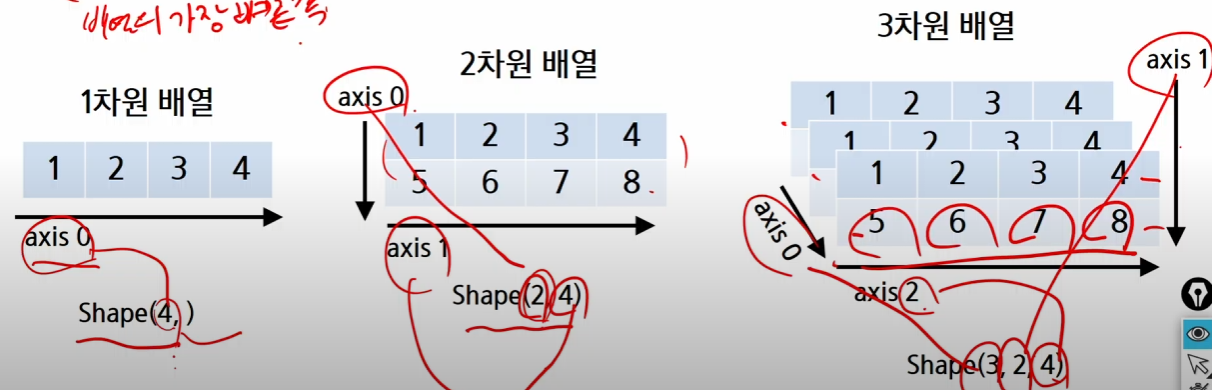

In [24]:
array1 = np.arange(10)
print('array1:\n', array1)

# (2, 5)로 reshape
array2 = array1.reshape(2, 5)
print('array2:\n', array2)

# (5, 2)로 reshape
array3 = array1.reshape(5, 2)
print('array3:\n', array3)

# (4, 3)으로 reshape 시도 - 오류 발생(값들의 갯수가 맞지 않음)
# array1.reshape(4, 3)  # ValueError 발생

array1:
 [0 1 2 3 4 5 6 7 8 9]
array2:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
array3:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [25]:
array1 = np.arange(10)

# 자동 계산 가능한 경우
array2 = array1.reshape(-1, 5)
print('array2 shape:', array2.shape)

array3 = array1.reshape(5, -1)
print('array3 shape:', array3.shape)

# 자동 계산 불가능한 경우 - 오류 발생
# array4 = array1.reshape(-1, 4)  # ValueError 발생

array2 shape: (2, 5)
array3 shape: (5, 2)


## Pandas와 Numpy

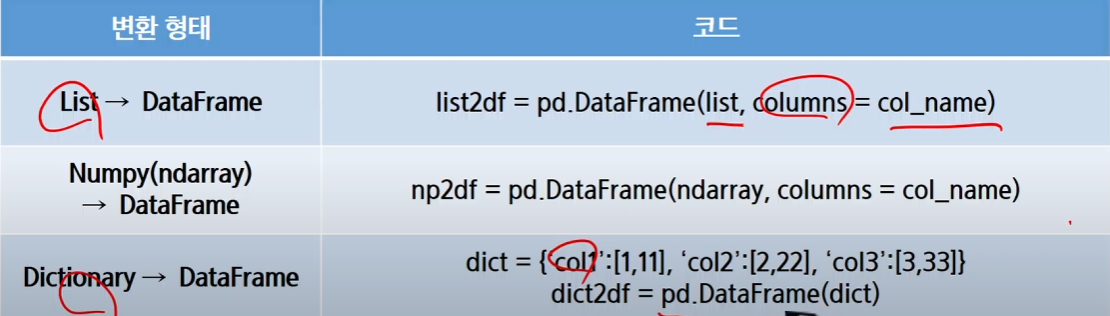

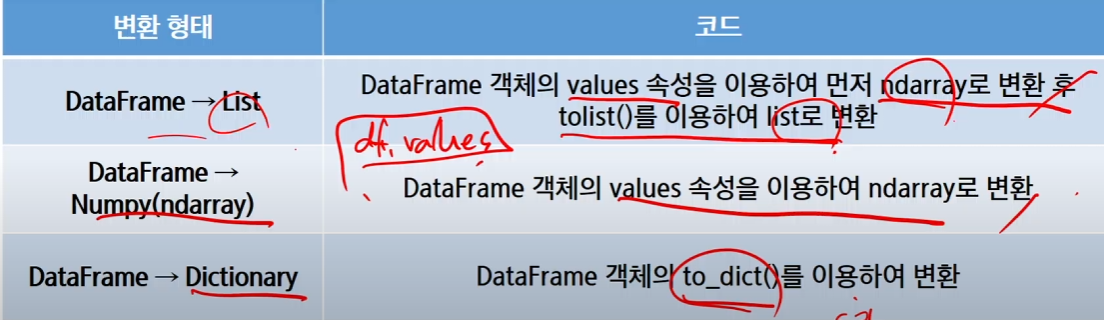

In [26]:
import numpy as np
import pandas as pd

s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
dates = pd.date_range("20130101", periods=6) # 2013-01-01 부터 2013-01-06까지 6일동안의 값
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) 
print(df)


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.894778  2.062289 -1.144665 -0.193168
2013-01-02 -0.616986  1.836043  0.693165  0.027906
2013-01-03  0.548230 -1.863233  0.615529 -0.082288
2013-01-04  0.920307  1.425569 -0.356271 -1.251261
2013-01-05 -0.993667  0.382983  0.251443 -1.325223
2013-01-06  0.876683  0.820780  1.708462  0.320128


In [ ]:
df2 = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
print(df2)


     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [35]:
print(df2.dtypes)


A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


In [ ]:
print(df.head())     # 상위 5개 행
print(df.tail(3))    # 하위 3개 행


In [36]:
print(df.index)
print(df.columns)


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [37]:
print(df.to_numpy())

[[-0.89477815  2.06228879 -1.14466476 -0.19316809]
 [-0.61698565  1.83604296  0.69316455  0.0279062 ]
 [ 0.54823036 -1.86323277  0.6155295  -0.08228848]
 [ 0.92030651  1.42556908 -0.35627064 -1.2512605 ]
 [-0.99366743  0.38298275  0.25144326 -1.32522279]
 [ 0.87668327  0.82077983  1.70846225  0.3201283 ]]


In [38]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.026702  0.777405  0.294611 -0.417318
std    0.903381  1.436814  0.975483  0.696318
min   -0.993667 -1.863233 -1.144665 -1.325223
25%   -0.825330  0.492432 -0.204342 -0.986737
50%   -0.034378  1.123174  0.433486 -0.137728
75%    0.794570  1.733424  0.673756  0.000358
max    0.920307  2.062289  1.708462  0.320128


In [39]:
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.894778   -0.616986    0.548230    0.920307   -0.993667    0.876683
B    2.062289    1.836043   -1.863233    1.425569    0.382983    0.820780
C   -1.144665    0.693165    0.615529   -0.356271    0.251443    1.708462
D   -0.193168    0.027906   -0.082288   -1.251261   -1.325223    0.320128


In [41]:
print(df["A"])
print(df[['A', 'B']])

2013-01-01   -0.894778
2013-01-02   -0.616986
2013-01-03    0.548230
2013-01-04    0.920307
2013-01-05   -0.993667
2013-01-06    0.876683
Freq: D, Name: A, dtype: float64
                   A         B
2013-01-01 -0.894778  2.062289
2013-01-02 -0.616986  1.836043
2013-01-03  0.548230 -1.863233
2013-01-04  0.920307  1.425569
2013-01-05 -0.993667  0.382983
2013-01-06  0.876683  0.820780


In [42]:
df[0:3]

,A,B,C,D
2013-01-01,-0.894778,2.062289,-1.144665,-0.193168
2013-01-02,-0.616986,1.836043,0.693165,0.027906
2013-01-03,0.548230,-1.863233,0.615529,-0.082288


In [47]:
print(df["20130102":"20130104"])
print(df.loc["20130102":"20130104"])

                   A         B         C         D
2013-01-02 -0.616986  1.836043  0.693165  0.027906
2013-01-03  0.548230 -1.863233  0.615529 -0.082288
2013-01-04  0.920307  1.425569 -0.356271 -1.251261
                   A         B         C         D
2013-01-02 -0.616986  1.836043  0.693165  0.027906
2013-01-03  0.548230 -1.863233  0.615529 -0.082288
2013-01-04  0.920307  1.425569 -0.356271 -1.251261


In [44]:
df.loc["20130102":"20130104", ["A", "B"]]


,A,B
2013-01-02,-0.616986,1.836043
2013-01-03,0.548230,-1.863233
2013-01-04,0.920307,1.425569


In [46]:
print(df.loc[dates[0], "A"])       # 위치 기반 접근
df.at[dates[0], "A"]        # 가장 빠른 방식


-0.8947781456843531


np.float64(-0.8947781456843531)

In [48]:
df.iloc[3]                  # 4번째 행 전체
df.iloc[3:5, 0:2]           # 4~5번째 행, 1~2번째 열
df.iloc[[1, 2, 4], [0, 2]]  # 특정 행/열 조합
df.iloc[1:3, :]             # 2~3번째 행, 전체 열
df.iloc[:, 1:3]             # 전체 행, 2~3번째 열
df.iloc[1, 1]               # 2행 2열 값
df.iat[1, 1]                # 빠른 2행 2열 접근


np.float64(1.8360429552304167)

In [49]:
df[df["A"] > 0]             # A 열이 0보다 큰 행만

df[df > 0]         # 특정 행 전체의 값이 전부 음수면 반환하지 않고, 하나라도 양수면 나머지 음수 값들을 NaN으로 바꿔서 반환


,A,B,C,D
2013-01-01,NaN,2.062289,NaN,NaN
2013-01-02,NaN,1.836043,0.693165,0.027906
2013-01-03,0.548230,NaN,0.615529,NaN
2013-01-04,0.920307,1.425569,NaN,NaN
2013-01-05,NaN,0.382983,0.251443,NaN
2013-01-06,0.876683,0.820780,1.708462,0.320128


In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2[df2["E"].isin(["two", "four"])]


In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)


In [ ]:
# 결측치가 있는 모든 행 제거
df1.dropna(how="any")

# 결측치를 5로 채우기
df1.fillna(value=5)


In [ ]:
pd.isna(df1)

## 데이터 처리와 집계

In [51]:
import pandas as pd

# Titanic 데이터 CSV 파일 로드
titanic_df = pd.read_csv("../1_pandas_basic/data/titanic.csv")

# DataFrame 출력
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
# 이름 기준 오름차순 정렬
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

# Pclass와 Name 기준 내림차순 정렬
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


In [53]:
print(titanic_df['Pclass'].nunique())
print(titanic_df['Survived'].nunique())
print(titanic_df['Name'].nunique())

3
2
891


In [54]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [55]:
# 평균
titanic_df[['Age', 'Fare']].mean()

# 합계
titanic_df[['Age', 'Fare']].sum()

# 최솟값
titanic_df[['Age', 'Fare']].min()


Age     0.42
Fare    0.00
dtype: float64

In [59]:
# groupby 객체 생성
titanic_groupby = titanic_df.groupby('Pclass')

# Age와 Fare에 대해 count
titanic_groupby[['Age', 'Fare']].count()


,Age,Fare
Pclass,,
1,186,216
2,173,184
3,355,491


In [60]:
# 최대값과 최소값을 나란히 출력
titanic_df.groupby('Pclass')['Age'].max(), titanic_df.groupby('Pclass')['Age'].min()


(Pclass
 1    80.0
 2    70.0
 3    74.0
 Name: Age, dtype: float64,
 Pclass
 1    0.92
 2    0.67
 3    0.42
 Name: Age, dtype: float64)

In [ ]:
# max, min 함께 보기
    # agg : 동일한 컬럼에 대해 서로 다른 집계함수를 적용하고 싶은 경우 활용
titanic_df.groupby('Pclass')['Age'].agg([max, min])


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_23944\3028529814.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max, min])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_23944\3028529814.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max, min])


,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [62]:
titanic_df.groupby(['Pclass']).agg(
    age_max=('Age', 'max'), # Age 컬럼에서 max 뽑기
    age_mean=('Age', 'mean'), # Age 컬럼에서 mean 뽑기
    fare_mean=('Fare', 'mean') # Fare 컬럼에서 mean 뽑기
)


,age_max,age_mean,fare_mean
Pclass,,,
1,80.0,38.233441,84.154687
2,70.0,29.877630,20.662183
3,74.0,25.140620,13.675550


In [63]:
agg_format = {
    'Age': 'max',
    'SibSp': 'sum',
    'Fare': 'mean'
}
titanic_df.groupby('Pclass').agg(agg_format)


,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


In [64]:
# 이름의 길이 계산
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x: len(x))
titanic_df[['Name', 'Name_len']].head(3)


,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [65]:
# 나이 기준으로 아동/성인 구분
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x: 'Child' if x <= 15 else 'Adult')
titanic_df[['Age', 'Child_Adult']].head(8)


,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,Adult
6,54.0,Adult
7,2.0,Child


In [66]:
def categorize_age(age):
    """
    나이에 따라 연령대를 분류하는 함수
    """
    if age <= 5:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 25:
        return 'Student'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

# 적용 및 확인
titanic_df['Age_cate'] = titanic_df['Age'].apply(categorize_age)
titanic_df[['Age', 'Age_cate']].head()


,Age,Age_cate
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


## 데이터 병합 및 변환 이론

In [67]:
import pandas as pd

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})

df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})

df3 = pd.concat([df1, df2], axis=0)  # 행 병합
df4 = pd.concat([df1, df2], axis=1)  # 열 병합

print(df1)
print('\n')
print(df2)
print('\n')
print(df3)
print('\n')
print(df4)


    A   B
0  A0  B0
1  A1  B1
2  A2  B2


    C   D
0  C0  D0
1  C1  D1
2  C2  D2


     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1
2  NaN  NaN   C2   D2


    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2


In [68]:
import pandas as pd

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})

df_merged = pd.merge(df1, df2, on='key', how='inner')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2


  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2


In [69]:
import pandas as pd

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})

df_merged = pd.merge(df1, df2, on='key', how='outer')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2


  key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K1  A1  B1   C1   D1
2  K2  A2  B2   C2   D2
3  K3  A3  B3  NaN  NaN


In [70]:
import pandas as pd

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})

df_merged = pd.merge(df1, df2, on='key', how='left')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2


  key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K1  A1  B1   C1   D1
2  K2  A2  B2   C2   D2
3  K3  A3  B3  NaN  NaN


In [71]:
import pandas as pd

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})

df_merged = pd.merge(df1, df2, on='key', how='right')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2


  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2


In [72]:
import pandas as pd

df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])

df2 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
}, index=['K0', 'K2', 'K3'])

df_merged = df1.join(df2, how='left')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2


     C   D
K0  C0  D0
K2  C1  D1
K3  C2  D2


     A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C1   D1


In [ ]:
sales = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'product_id': [101, 102, 103, 104],
    'quantity': [5, 2, 3, 1]
})

customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'city': ['Seoul', 'Busan', 'Daegu', 'Incheon']
})

sales = sales.set_index('customer_id') # sql에서 pk와 비슷
customers = customers.set_index('customer_id')

merged_data = sales.join(customers, how='left')

print(sales)
print('\n')
print(customers)
print('\n')
print(merged_data)


             product_id  quantity
customer_id                      
1                   101         5
2                   102         2
3                   103         3
4                   104         1


                name     city
customer_id                  
1              Alice    Seoul
2                Bob    Busan
3            Charlie    Daegu
5              David  Incheon


             product_id  quantity     name   city
customer_id                                      
1                   101         5    Alice  Seoul
2                   102         2      Bob  Busan
3                   103         3  Charlie  Daegu
4                   104         1      NaN    NaN


In [ ]:
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'C': ['C0', 'C1', 'C2', 'C3']
})

df2 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'C': ['C4', 'C5', 'C6'],
    'D': ['D0', 'D1', 'D2']
})

df_merged = pd.merge(df1, df2, on='key', how='inner', suffixes=('_left', '_right')) # C 컬럼이 중복될 때 suffixes로 지정

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


  key   A   C
0  K0  A0  C0
1  K1  A1  C1
2  K2  A2  C2
3  K3  A3  C3


  key   C   D
0  K0  C4  D0
1  K1  C5  D1
2  K2  C6  D2


  key   A C_left C_right   D
0  K0  A0     C0      C4  D0
1  K1  A1     C1      C5  D1
2  K2  A2     C2      C6  D2


In [ ]:
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
})

df_merged = pd.merge(df1, df2, on='key', how='inner')
df_merged = df_merged.drop('B', axis=1)

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


In [ ]:
df1 = pd.DataFrame({
    'key1': ['K0', 'K1', 'K2', 'K3'],
    'key2': ['K4', 'K5', 'K6', 'K7'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'key1': ['K0', 'K1', 'K2'],
    'key2': ['K4', 'K5', 'K6'],
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
})

df_merged = pd.merge(df1, df2, on=['key1', 'key2'], how='inner')

print(df1)
print('\n')
print(df2)
print('\n')
print(df_merged)


In [ ]:
import pandas as pd

# Titanic 데이터 CSV 파일 로드
replace_test_df = pd.read_csv("../data/titanic.csv")

In [ ]:
import numpy as np

# 예: Titanic 데이터
replace_test_df['Sex'] = replace_test_df['Sex'].replace({'male': 'Man', 'female': 'Woman'})
print(replace_test_df.head(10))


In [ ]:
# NaN을 특정 값으로 대체
replace_test_df['Cabin'] = replace_test_df['Cabin'].replace(np.nan, 'CXXX')

# Cabin별 값 개수 확인
print(replace_test_df['Cabin'].value_counts(dropna=False))